In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  6 19:04:21 2019

@author: SUN
"""


#####################################################################
# Black Scholes pour Devise (Garman Khlhagen) et les lettres grecques
#####################################################################

import math

from math import pi  # Importation de la constante pi du module math
from math import e  # Importation de la constante e du module math

from math import sqrt  # Importation de la fonction sqrt du module math
from math import log  # Importation de la fonction log du module math
from math import exp  # Importation de la fonction exp du module math

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy  # SciPy Package
import scipy.stats as stats

def Fwd(S, r, q, T):
    Fw = S * exp((r - q) * T)
    return Fw

S = 1.135  # Spot EURUSD
r = 2.60/100  # Taux sans risque $
q = -0.31/100  # Taux sans risque €
T = 0.25  # 3 mois

Fw = Fwd(S, r, q, T)


def d_un(S, K, sigma, T, r, q):
    #d1=(1/(sigma*sqrt(T)))*(log(S/K)+(r-q+(sigma**2)/2)*T)
    d1 = (log(S/K)+(r-q+(sigma**2)/2)*T) / (sigma*sqrt(T))
    return(d1)


def d_deux(S, K, sigma, T, r, q):
    d2 = d_un(S, K, sigma, T, r, q) - (sigma*sqrt(T))
    return(d2)

# Option Call
#------------


def bs_call(S, K, sigma, T, r, q):
    d1 = d_un(S, K, sigma, T, r, q)
    d2 = d_deux(S, K, sigma, T, r, q)
    N_d1 = stats.norm.cdf(d1, 0, 1)
    N_d2 = stats.norm.cdf(d2, 0, 1)
    op_call = (S*exp(-q*T)*N_d1)-(K*exp(-r*T)*N_d2)
    return(op_call)

def bs_put(S, K, sigma, T, r, q):
    d1 = d_un(S, K, sigma, T, r, q)
    d2 = d_deux(S, K, sigma, T, r, q)
    N_nd1 = stats.norm.cdf(-d1, 0, 1)
    N_nd2 = stats.norm.cdf(-d2, 0, 1)
    op_put = (-S*exp(-q*T)*N_nd1)+(K*exp(-r*T)*N_nd2)
    return(op_put)

def delta_call(S, K, sigma, T, r, q):
    d1 = d_un(S, K, sigma, T, r, q)
    N_d1 = stats.norm.cdf(d1, 0, 1)
    v_delta = exp(-q*T)*N_d1
    return(v_delta)

def delta_put(S, K, sigma, T, r, q):
    d1 = d_un(S, K, sigma, T, r, q)
    N_d1 = stats.norm.cdf(d1, 0, 1)
    v_delta = exp(-q*T)*(N_d1 - 1)
    return(v_delta)

def bs_gamma(S, K, sigma, T, r, q):
    d1 = d_un(S, K, sigma, T, r, q)
    Np_d1 = stats.norm.pdf(d1, 0, 1)
    v_gamma = (Np_d1*exp(-q*T))/(S*sigma*sqrt(T))
    return(v_gamma)


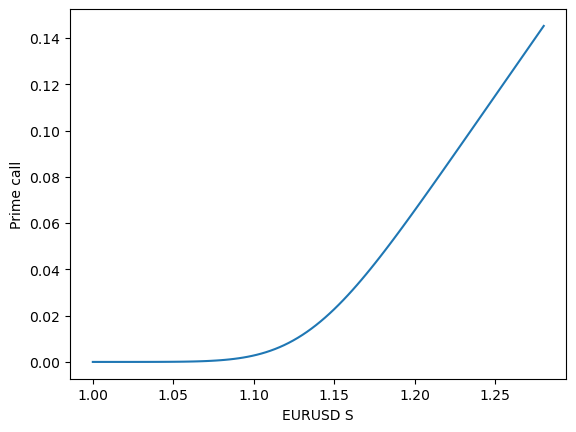

In [18]:
lb = 0.7
ub = 1.7
K = 1.1432

sigma = 6.16/100
lb = 1.00
ub = 1.28

x = np.linspace(lb, ub, 100)

Prime_V = [bs_call(xi, K, sigma, T, r, q) for xi in x]

Abcisse_V = [0 for xi in x]

plt.plot(x, Prime_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call')
plt.xlabel("EURUSD S")
plt.show()


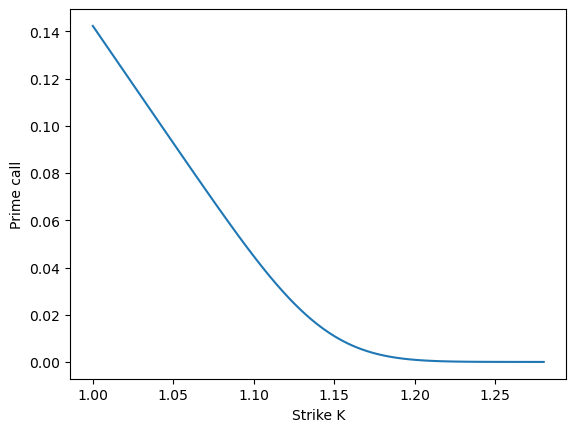

In [17]:
S = 1.135  # Spot EURUSD
K = 1.1432

sigma = 6.16/100
lb = 0.7
ub = 1.7

lb = 1.00
ub = 1.28

x = np.linspace(lb, ub, 100)
Prime_V = [bs_call(S, xi, sigma, T, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Prime_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call')
plt.xlabel("Strike K")
plt.show()


EURUSD Spot:1.14320
bs_call:0.01854


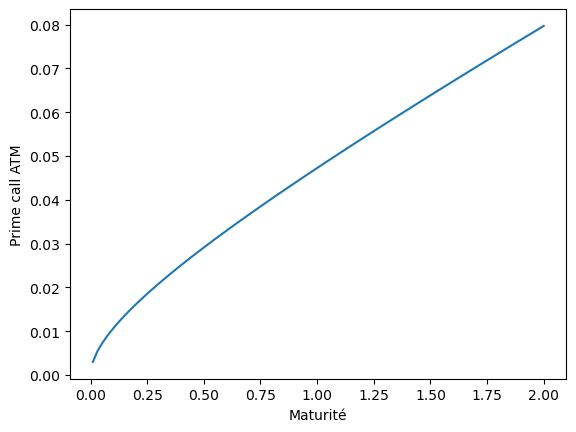

In [4]:
# Cas At the money

S = 1.1432  # Spot EURUSD
print("EURUSD Spot:" "%.5f" % S)

r = 2.60/100  # Taux sans risque $
q = -0.31/100  # Taux sans risque €

T = 0.25  # 3 mois

K = 1.1432

sigma = 6.16/100

v_bs_call = bs_call(S, K, sigma, T, r, q)

print("bs_call:" "%.5f" % v_bs_call)


lb = 0.01
ub = 2

x = np.linspace(lb, ub, 100)
Prime_ATM_V = [bs_call(S, K, sigma, xi, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Prime_ATM_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call ATM')
plt.xlabel("Maturité")
plt.show()


EURUSD Spot:1.17500
bs_call:0.04243


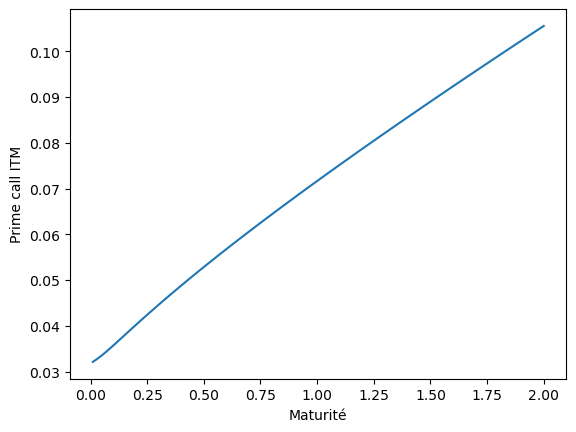

In [5]:
# Cas In the money

S = 1.175 # Spot EURUSD

print("EURUSD Spot:" "%.5f" % S)

r = 2.60/100 # Taux sans risque $
q = -0.31/100 # Taux sans risque €

T = 0.25 # 3 mois

K = 1.1432

sigma = 6.16/100

v_bs_call = bs_call(S,K,sigma,T,r,q)

print("bs_call:" "%.5f" % v_bs_call)


lb = 0.01
ub = 2

x=np.linspace(lb,ub,100)
Prime_ITM_V = [bs_call(S,K,sigma,xi,r,q) for xi in x]
Abcisse_V = [0 for xi in x]

x=np.linspace(lb,ub,100)
plt.plot(x,Prime_ITM_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call ITM')
plt.xlabel("Maturité")
plt.show()


EURUSD Spot:1.11500
bs_call:0.00609


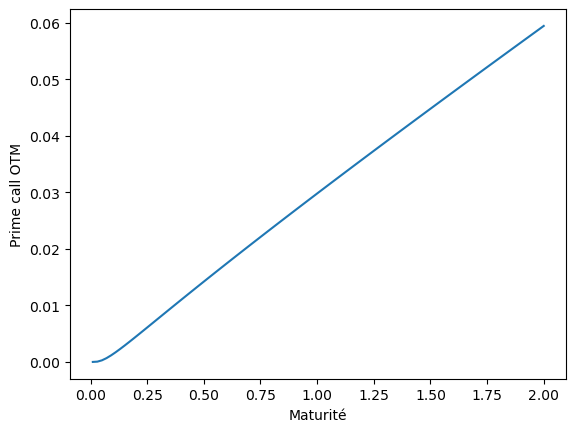

In [6]:
# Cas Out of the money

S = 1.115  # Spot EURUSD

print("EURUSD Spot:" "%.5f" % S)

r = 2.60/100  # Taux sans risque $
q = -0.31/100  # Taux sans risque €

T = 0.25  # 3 mois

K = 1.1432

sigma = 6.16/100

v_bs_call = bs_call(S, K, sigma, T, r, q)

print("bs_call:" "%.5f" % v_bs_call)


lb = 0.01
ub = 2

x = np.linspace(lb, ub, 100)
Prime_OTM_V = [bs_call(S, K, sigma, xi, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Prime_OTM_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call OTM')
plt.xlabel("Maturité")
plt.show()


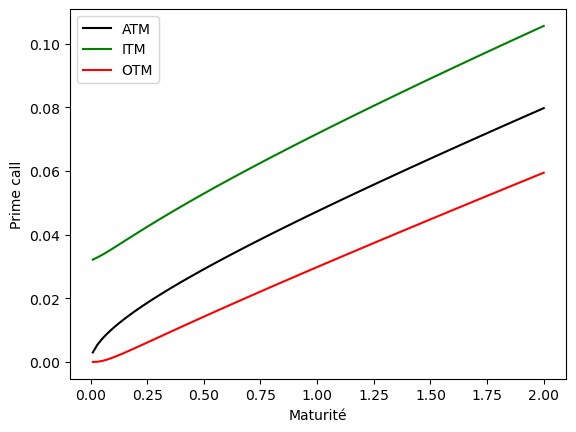

In [9]:
x = np.linspace(lb, ub, 100)
plt.plot(x, Prime_ATM_V, 'k', label="ATM")
plt.plot(x, Prime_ITM_V, 'g', label="ITM")
plt.plot(x, Prime_OTM_V, 'r', label="OTM")
plt.legend()
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime call')
plt.xlabel("Maturité")
plt.show()


prime_put:0.01391


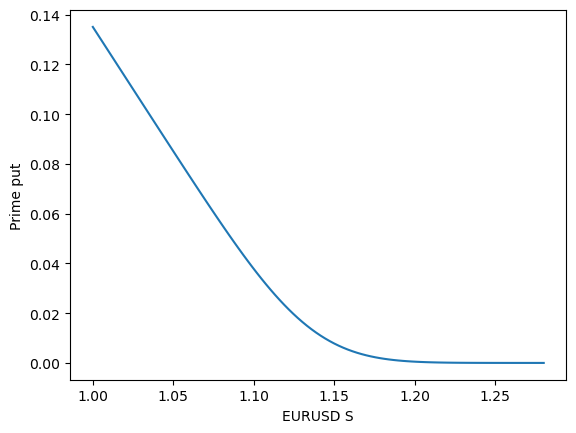

In [10]:
S = 1.135  # Spot EURUSD

r = 2.60/100  # Taux sans risque $
q = -0.31/100  # Taux sans risque €
T = 0.25  # 3 mois

K = 1.1432
sigma = 6.16/100

prime_put = bs_put(S, K, sigma, T, r, q)

print("prime_put:" "%.5f" % prime_put)


# Variation Prime put = F(S), K fixe
#------------------------------------

lb = 0.7
ub = 1.7

lb = 1.00
ub = 1.28

x = np.linspace(lb, ub, 100)
Prime_V = [bs_put(xi, K, sigma, T, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Prime_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Prime put')
plt.xlabel("EURUSD S")
plt.show()


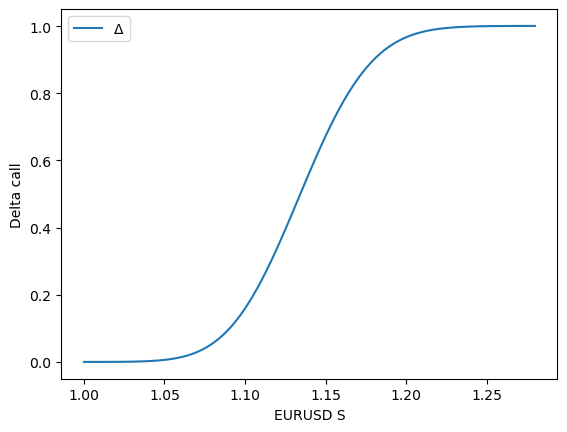

In [13]:
lb = 0.7
ub = 1.7

lb = 1.00
ub = 1.28

x = np.linspace(lb, ub, 100)
Delta_V = [delta_call(xi, K, sigma, T, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Delta_V, label="$\Delta$")
plt.legend()
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Delta call')
plt.xlabel("EURUSD S")
plt.show()


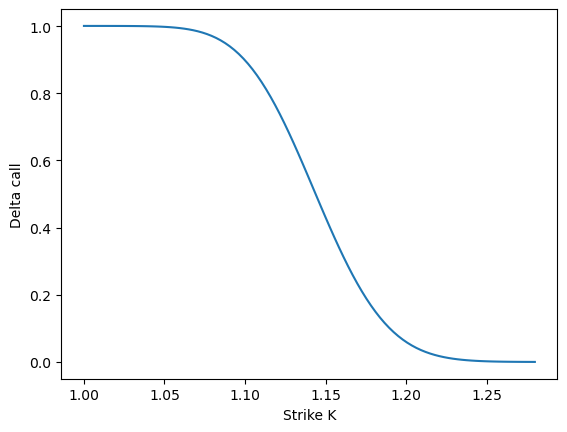

In [14]:
x = np.linspace(lb, ub, 100)
Delta_V = [delta_call(S, xi, sigma, T, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Delta_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Delta call')
plt.xlabel("Strike K")
plt.show()


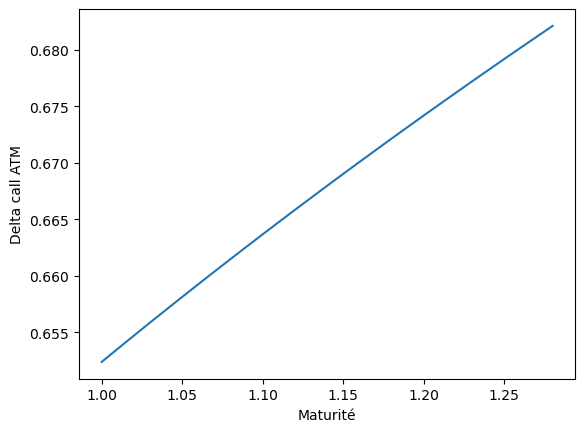

In [15]:
x = np.linspace(lb, ub, 100)
Delta_ATM_V = [delta_call(S, K, sigma, xi, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Delta_ATM_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Delta call ATM')
plt.xlabel("Maturité")
plt.show()


EURUSD Spot:1.17500
Delta_call:0.87403


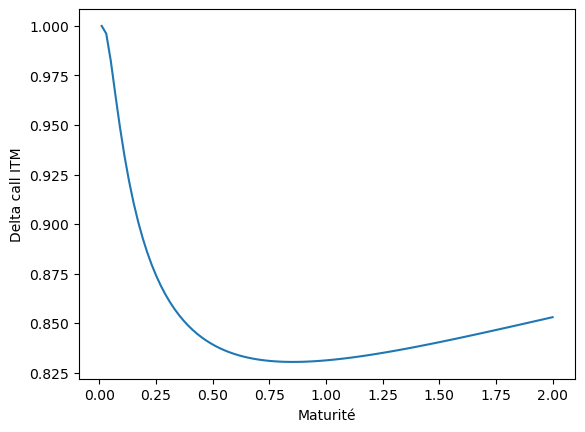

In [16]:

S = 1.175  # Spot EURUSD

print("EURUSD Spot:" "%.5f" % S)

r = 2.60/100  # Taux sans risque $
q = -0.31/100  # Taux sans risque €

T = 0.25  # 3 mois

K = 1.1432

sigma = 6.16/100

v_delta_call = delta_call(S, K, sigma, T, r, q)

print("Delta_call:" "%.5f" % v_delta_call)


lb = 0.01
ub = 2

x = np.linspace(lb, ub, 100)
Delta_ITM_V = [delta_call(S, K, sigma, xi, r, q) for xi in x]
Abcisse_V = [0 for xi in x]

x = np.linspace(lb, ub, 100)
plt.plot(x, Delta_ITM_V)
#plt.plot(x,Abcisse_V, 'k')
plt.ylabel('Delta call ITM')
plt.xlabel("Maturité")
plt.show()


In [28]:
import numpy as np
from math import sqrt, pi, log, e
from enum import Enum
import scipy.stats as stat
from scipy.stats import norm
import time


class BSMerton:
    def __init__(self, args):
        self.Type = int(args[0])                # 1 for a Call, - 1 for a put
        self.S = float(args[1])                 # Underlying asset price
        self.K = float(args[2])                 # Option strike K
        self.r = float(args[3])                 # Continuous risk fee rate
        self.q = float(args[4])                 # Dividend continuous rate
        self.T = float(args[5]) / 365.0         # Compute time to expiry
        self.sigma = float(args[6])             # Underlying volatility
        self.sigmaT = self.sigma * self.T ** 0.5  # sigma*T for reusability
        self.d1 = (log(self.S / self.K) +
                   (self.r - self.q + 0.5 * (self.sigma ** 2))
                   * self.T) / self.sigmaT
        self.d2 = self.d1 - self.sigmaT
        [self.Delta] = self.delta()

    def delta(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [dfq * norm.cdf(self.d1)]
        else:
            return [dfq * (norm.cdf(self.d1) - 1)]
